In [13]:
# Análisis de datos con Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Análisis de datos

In [14]:
df = pd.read_csv('Datos/Xeek_train_subset_clean.csv')

In [15]:
df.head()

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15/9-13,494.528,NORDLAND GP.,NaN,19.480835,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,Shale
1,15/9-13,494.680,NORDLAND GP.,NaN,19.468800,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,Shale
2,15/9-13,494.832,NORDLAND GP.,NaN,19.468800,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,Shale
3,15/9-13,494.984,NORDLAND GP.,NaN,19.459282,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,Shale
4,15/9-13,495.136,NORDLAND GP.,NaN,19.453100,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,Shale


In [16]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524495,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   GROUP      133198 non-null  object 
 3   FORMATION  111632 non-null  object 
 4   CALI       133006 non-null  float64
 5   RDEP       125805 non-null  float64
 6   RHOB       108053 non-null  float64
 7   GR         133198 non-null  float64
 8   NPHI       91725 non-null   float64
 9   PEF        100840 non-null  float64
 10  DTC        132635 non-null  float64
 11  LITH       133198 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.2+ MB


In [18]:
df['LITH'].nunique()

11

In [19]:
df['LITH'].unique()

array(['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite'],
      dtype=object)

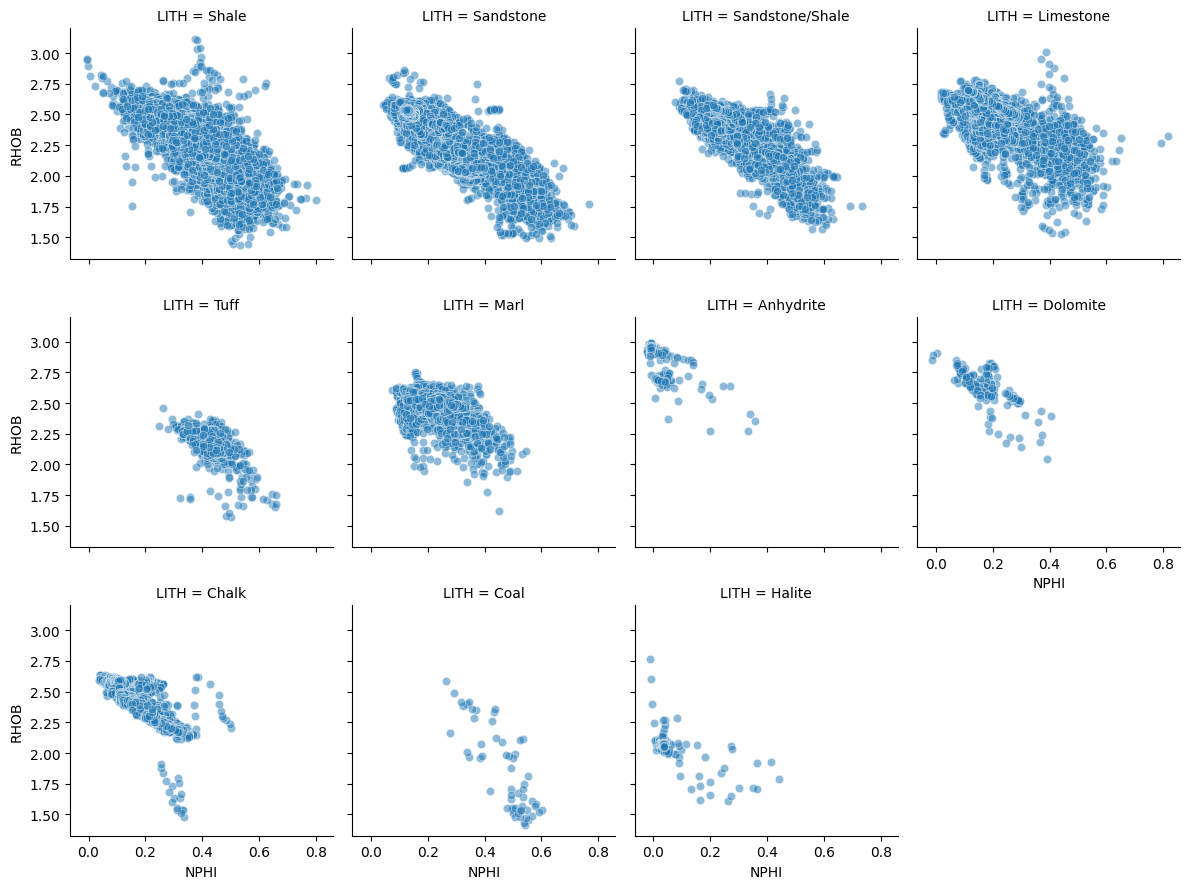

In [20]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
plt.show()

<Axes: >

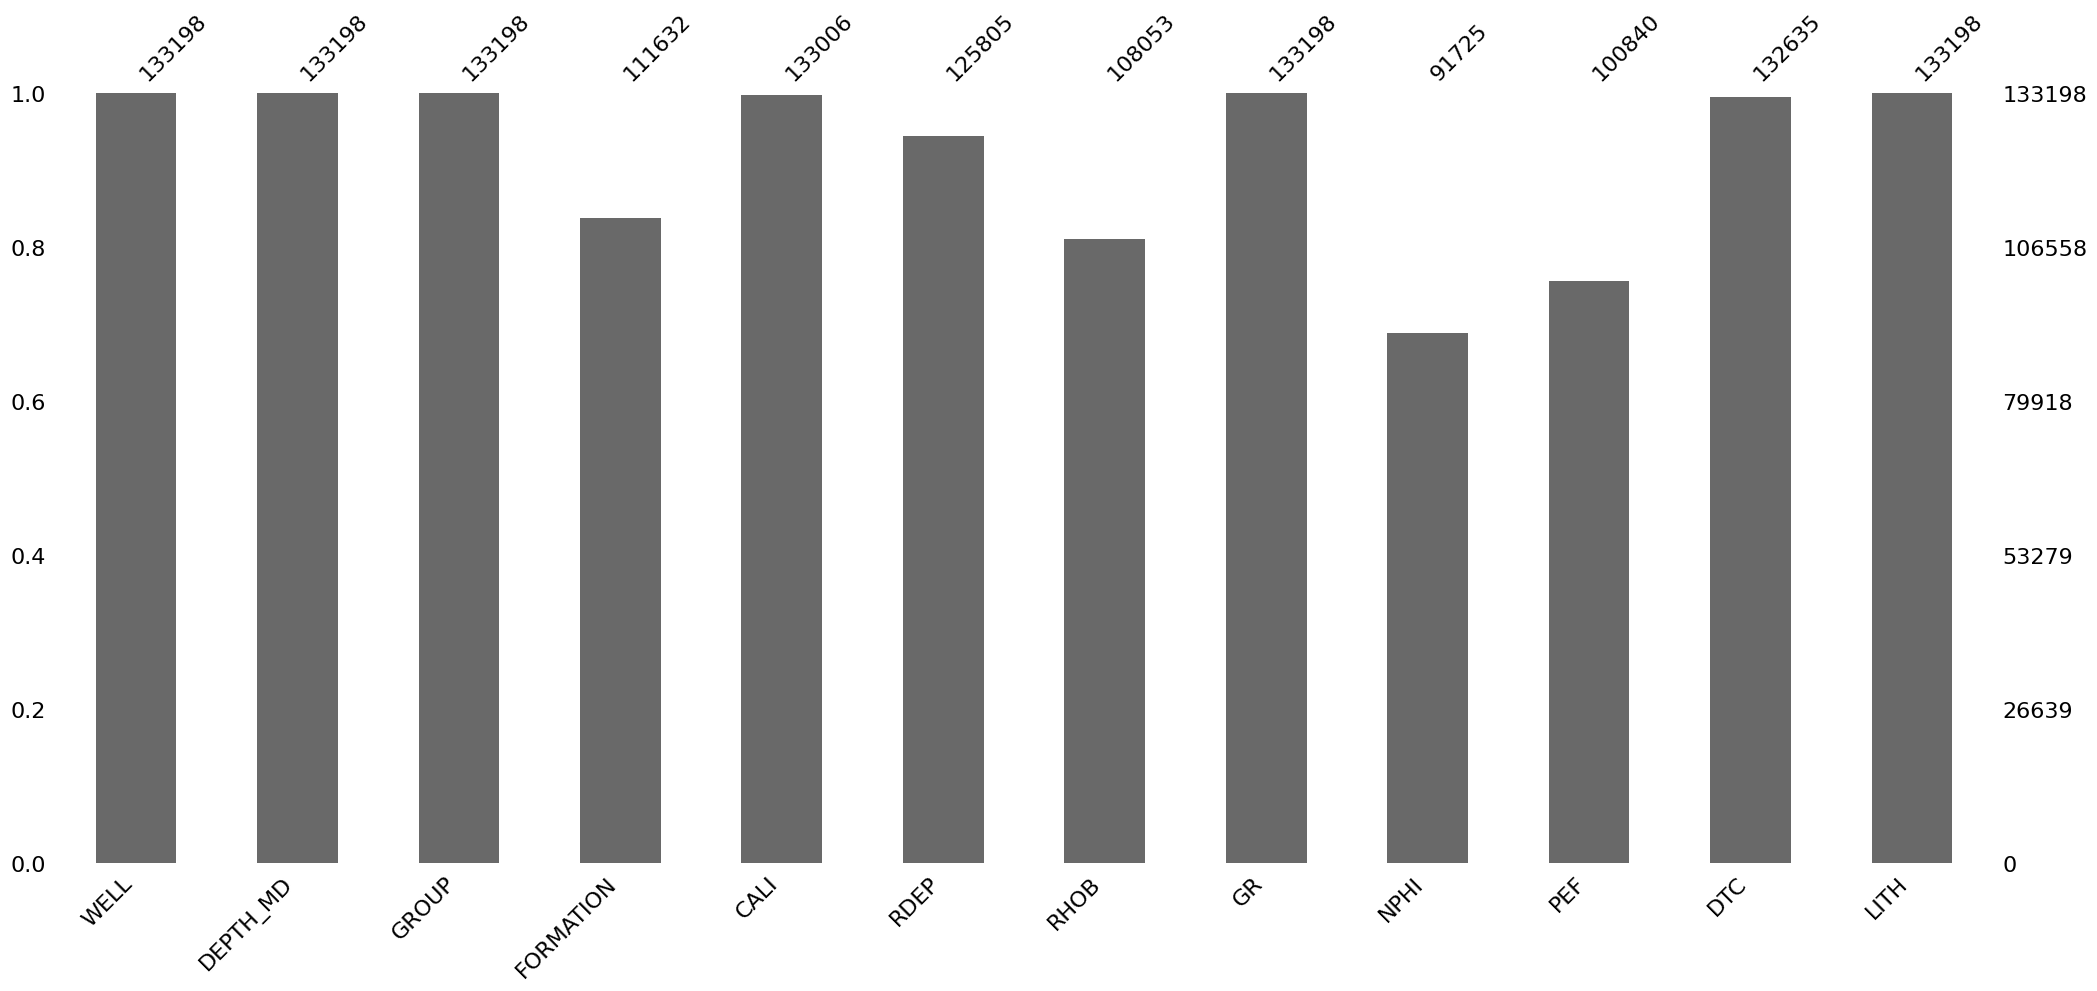

In [21]:
mno.bar(df)

In [22]:
df.dropna(inplace=True)

<Axes: >

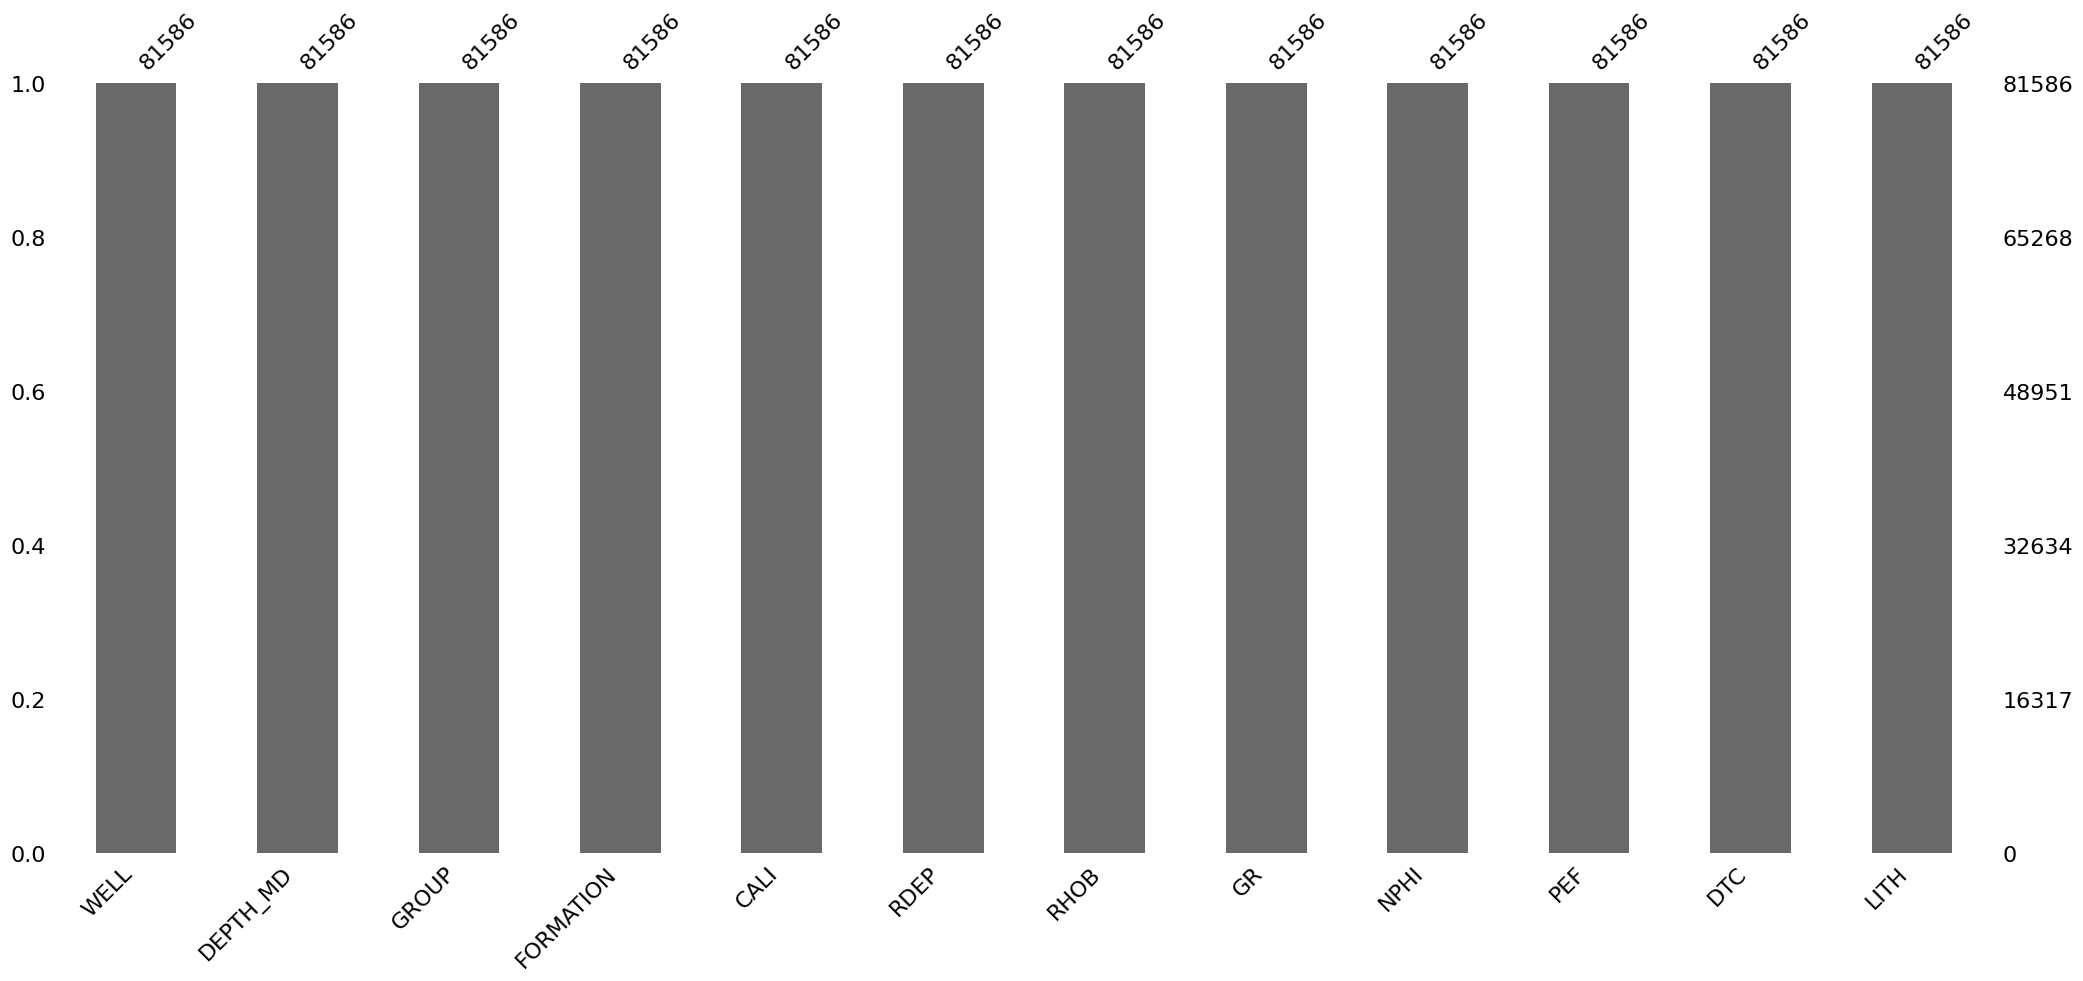

In [23]:
mno.bar(df)

In [24]:
df['LITH'].value_counts()

LITH
Shale              48705
Limestone          10973
Sandstone          10076
Sandstone/Shale     4578
Marl                3715
Chalk               2254
Tuff                1034
Dolomite              98
Anhydrite             75
Coal                  58
Halite                20
Name: count, dtype: int64

## Crear modelo Random Forest

In [25]:
df.columns

Index(['WELL', 'DEPTH_MD', 'GROUP', 'FORMATION', 'CALI', 'RDEP', 'RHOB', 'GR',
       'NPHI', 'PEF', 'DTC', 'LITH'],
      dtype='object')

In [26]:
# Definiendo las variables independientes y dependientes

X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y = df['LITH']

In [27]:
# Dividiendo los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Creando el modelo

clf = RandomForestClassifier(random_state=42)

In [29]:
# Entrenando el modelo

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluar modelo

In [30]:
y_pred = clf.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.9168402990562569

In [32]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       0.90      0.95      0.92        19
          Chalk       0.90      0.74      0.81       431
           Coal       0.77      0.62      0.69        16
       Dolomite       0.77      0.43      0.56        23
         Halite       0.80      0.57      0.67         7
      Limestone       0.89      0.88      0.88      2145
           Marl       0.88      0.78      0.83       726
      Sandstone       0.90      0.90      0.90      2084
Sandstone/Shale       0.79      0.67      0.72       930
          Shale       0.94      0.98      0.96      9739
           Tuff       0.75      0.51      0.61       198

       accuracy                           0.92     16318
      macro avg       0.84      0.73      0.78     16318
   weighted avg       0.91      0.92      0.91     16318



In [33]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  18    0    0    0    0    0    0    0    0    1    0]
 [   0  317    0    0    0  102    0    4    8    0    0]
 [   0    0   10    0    0    0    0    0    0    6    0]
 [   0    0    0   10    0    2    0    7    0    4    0]
 [   0    0    0    0    4    0    0    0    0    3    0]
 [   2   32    0    1    0 1888   34   26   18  143    1]
 [   0    4    0    0    0   82  569    1    9   60    1]
 [   0    0    1    2    0   19   11 1867   71  110    3]
 [   0    0    2    0    0    6   11  104  620  186    1]
 [   0    0    0    0    1   25   20   53   56 9557   27]
 [   0    0    0    0    0    2    0   13    1   81  101]]


In [34]:
labels = df['LITH'].unique()
labels.sort()

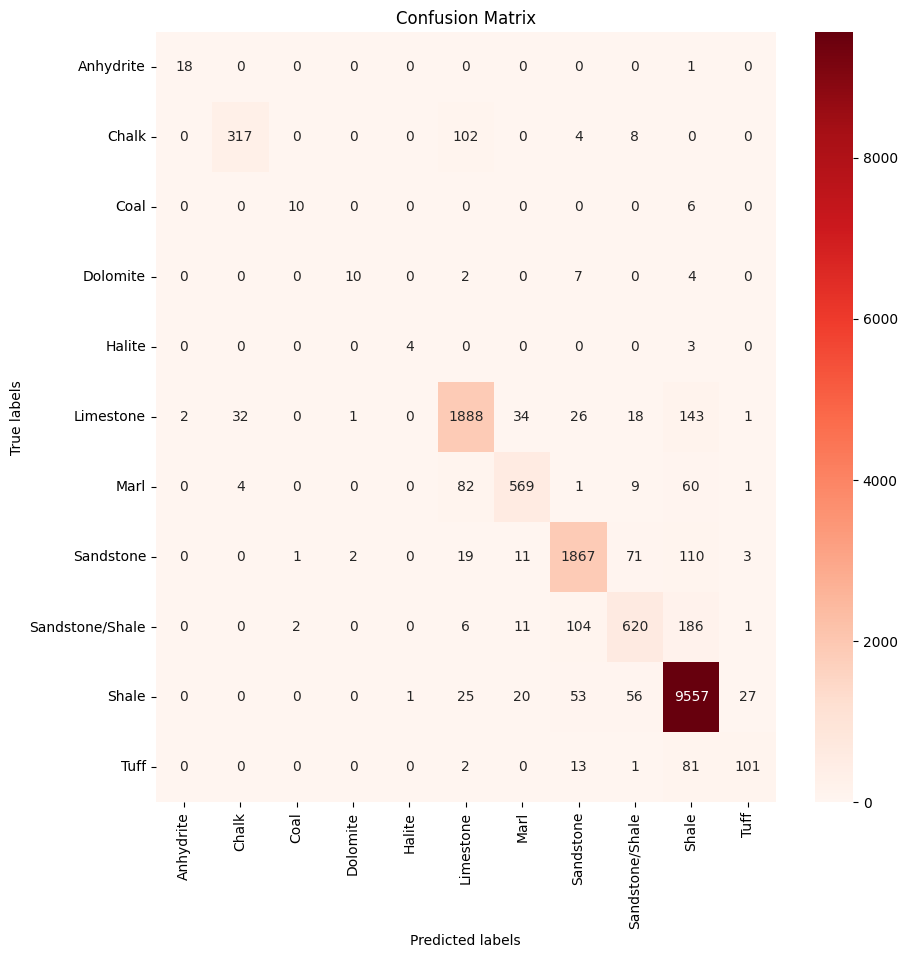

In [35]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Reds", xticklabels=labels, yticklabels=labels)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

<Axes: xlabel='LITH', ylabel='Count'>

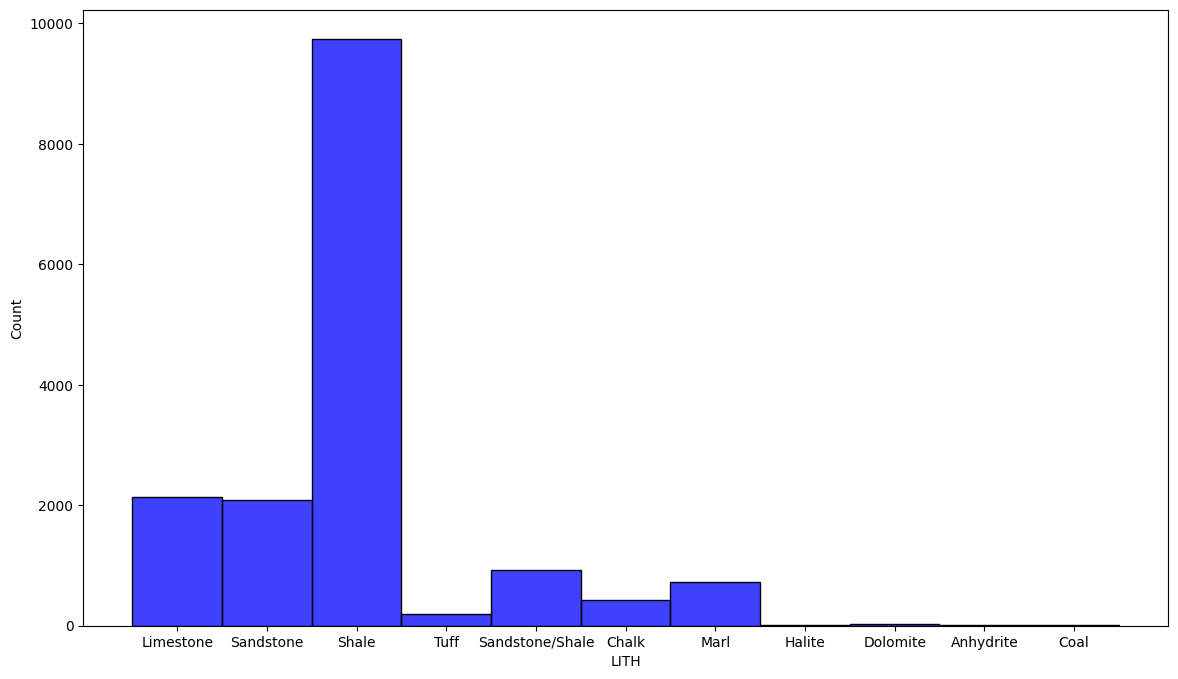

In [40]:
fig = plt.figure(figsize=(14, 8))
sns.histplot(y_test, color='blue', label='Test', bins=df['LITH'].nunique())

<Axes: xlabel='LITH', ylabel='Count'>

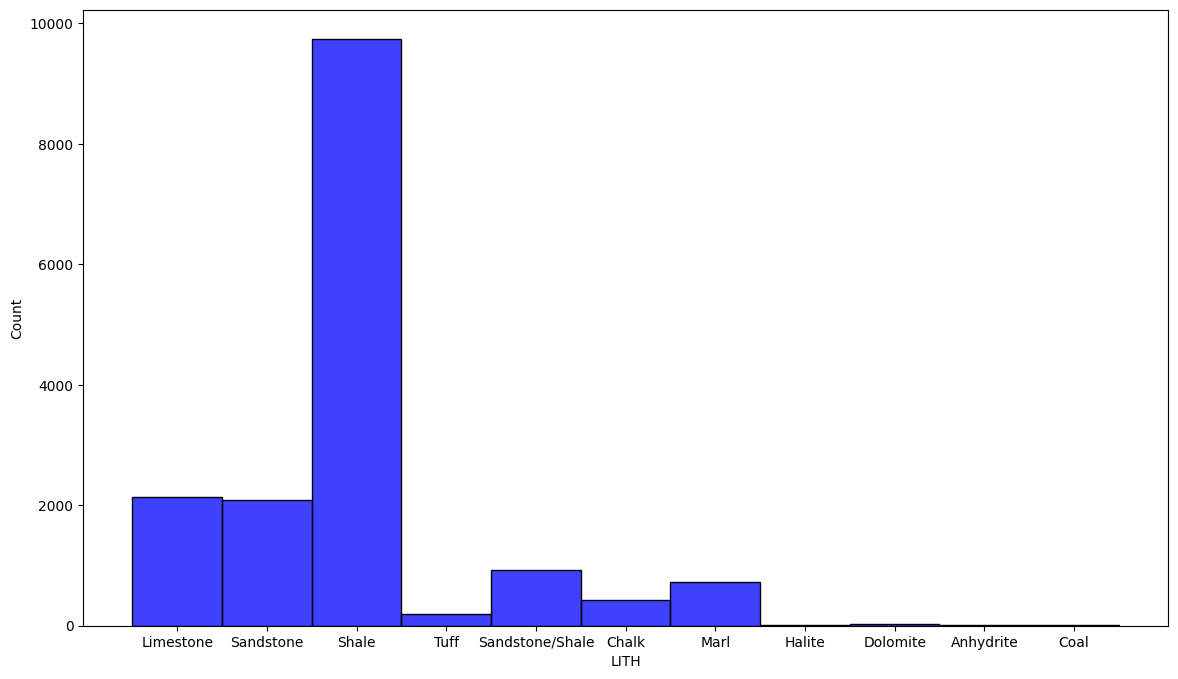

In [42]:
fig = plt.figure(figsize=(14, 8))
sns.histplot(y_test, color='blue', label='Test', bins=df['LITH'].nunique())